<p style="text-align: center;"><strong> Linear Regression to predict profits for a restaurant franchise  </strong>( 1 feature ). </p>
GOAL :  inputing a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline 
# to not use plt.show() everytime

In [15]:
# functions to load the data
def load_data():
    data = np.loadtxt("data1.txt", delimiter=',')
    X = data[:, 0]
    y = data[:, 1]
    return X, y


def load_data_multi():
    data = np.loadtxt("data2.txt", delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y

x_train, y_train = load_data() # population in 10,000 and restaurant profit in units of $10,000

# The city population array has 97 data points, and the monthly average profits also has 97 data points.


Always do : 
- <p> View the variables : print() <p>
- <p> Check the dimensions of the variables : .shape <p>
- <p> Visualize the data <p>

Text(0.5, 0, 'Population of City in 10,000s')

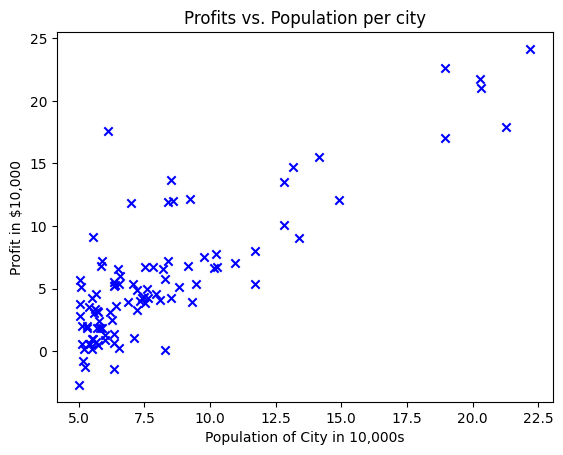

In [13]:
# Visualisation 
plt.scatter(x_train, y_train, marker='x', c='b') # x markers in blue color 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

In [24]:
def compute_cost(x, y, w_0, b_0):
    m = x.shape[0]
    j_wb = np.zeros(m)
    for i in range(m):
        f_wb = w_0*x[i]+b_0
        j_wb[i] = (f_wb - y[i])**2  
    return np.sum(j_wb)/ (2 * m)
    

In [27]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i]) * x[i]
    dj_db /= m 
    dj_dw /= m 
    return dj_dw, dj_db     

In [42]:
def gradient_descent(x, y, w_0, b_0, niters, alpha, compute_gradient, compute_cost ):
    m = x.shape[0] # or len(x)
    J_history = []
    w_history = []
    w = w_0
    b = b_0
    for i in range(niters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i<10000:   # limiting the number of iterations to prevent resource exhaustion while saving the values f J
            J =  compute_cost(x, y, w, b)
            J_history.append(J)
        if i% (niters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")    
        
    return w, b, J_history, w_history

In [43]:
initial_w = 0.
initial_b = 0.
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, iterations, alpha, compute_gradient, compute_cost)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


Text(0.5, 0, 'Population of City in 10,000s')

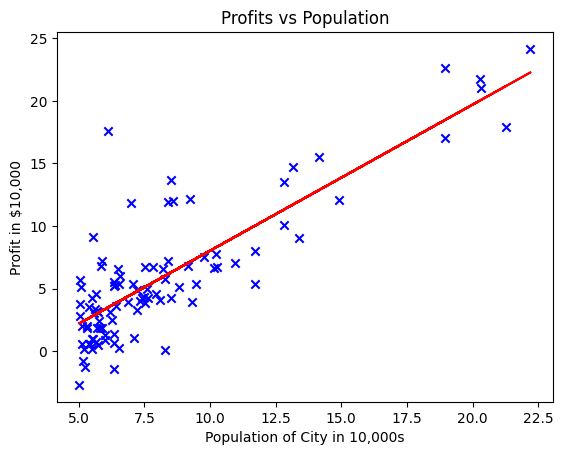

In [46]:
# Ploting predictions vs Target values  
m = len(x_train)
p = np.zeros(m)
for i in range(m):
    p[i] = w*x_train[i]+b

plt.plot(x_train, p, c = "r") # linear
plt.scatter(x_train, y_train, marker='x', c='b') # scatter 
plt.title("Profits vs Population")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

Final Test for the model:
-  Let's predict what the profit would be in an area of 100,000 people

In [65]:
def predict(X, w, b):
    prediction = w*(X/10000) + b
    print(f"In a city with {X} people, The profit will be {prediction * 10000:.2f} $") 

In [69]:
predict(100000, w, b)

In a city with 100000 people, The profit will be 80333.32 $
